In [1]:
# Importing Libraries

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the style for the plots
plt.style.use('ggplot')

# Set the figure size for the plots
plt.figure(figsize=(12, 8))

# Read in the data
df = pd.read_csv(r'Projects/movies.csv')

## Print hello world
print("Hello Welcome to my Project")
## Df = pd.read_csv(r'Projects/movies.csv')


Hello Welcome to my Project


<Figure size 1200x800 with 0 Axes>

In [2]:
# Taking a glimpse of the Data

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#Taking a look at the last row of columns

df.tail()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [4]:
# Glancing at some descriptive stats

df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [5]:
#Information about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
# Check for missing data in the entire DataFrame

missing_data = df.isna().sum()

# Print the number of missing values for each column

print(missing_data)


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [7]:
#Percentage of Missing Values in DataFrame

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [8]:
# Changing the data types of the columns
columns_to_convert = ['budget', 'gross', 'runtime', 'score', 'votes']

for column in columns_to_convert:
    df[column] = df[column].fillna(0).astype('int64')

# Removing rows containing non-finite values
columns_to_dropna = ['budget', 'runtime', 'score', 'gross', 'votes']

for column in columns_to_dropna:
    df = df.dropna(subset=[column])
    df[column] = df[column].astype('int64')


In [9]:
#Viewing Dataframe

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",0,0,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120


In [10]:
# Split 'released' column into 'release_year', 'release_month', 'release_day', and 'release_state'
df[['release_year', 'release_month', 'release_day', 'release_state']] = df['released'].str.split(' ', n=3, expand=True)

# Rename 'release_year' and 'release_state' columns
df = df.rename(columns={'release_year': 'Release_Year', 'release_state': 'Release_State'})

# Drop the original 'released' column
df = df.drop(columns=['released'])






In [11]:
# Display the first few rows of the DataFrame to view the newly created columns
print(df.head())


                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

   score    votes         director                   writer            star  \
0      8   927000  Stanley Kubrick             Stephen King  Jack Nicholson   
1      5    65000   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   
2      8  1200000   Irvin Kershner           Leigh Brackett     Mark Hamill   
3      7   221000     Jim Abrahams             Jim Abrahams     Robert Hays   
4      7   108000     Harold Ramis       Brian Doyle-Murray     Chevy Chase   

          country    budget      gross             company  ru

In [12]:
# Convert 'release_year' and 'release_month' to strings and concatenate them
df['Release_YearMonth'] = df['Release_Year'] + '-' + df['release_month']

# Drop the 'release_year' and 'release_month' columns if needed
df = df.drop(columns=['Release_Year', 'release_month'])


In [13]:
print(df.head())


                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

   score    votes         director                   writer            star  \
0      8   927000  Stanley Kubrick             Stephen King  Jack Nicholson   
1      5    65000   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   
2      8  1200000   Irvin Kershner           Leigh Brackett     Mark Hamill   
3      7   221000     Jim Abrahams             Jim Abrahams     Robert Hays   
4      7   108000     Harold Ramis       Brian Doyle-Murray     Chevy Chase   

          country    budget      gross             company  ru

In [14]:
#Viewing the Updated DataFrame

print(df.head())

                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

   score    votes         director                   writer            star  \
0      8   927000  Stanley Kubrick             Stephen King  Jack Nicholson   
1      5    65000   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   
2      8  1200000   Irvin Kershner           Leigh Brackett     Mark Hamill   
3      7   221000     Jim Abrahams             Jim Abrahams     Robert Hays   
4      7   108000     Harold Ramis       Brian Doyle-Murray     Chevy Chase   

          country    budget      gross             company  ru

In [15]:
df = df.sort_values (by=['gross'],inplace=False,ascending=False)

In [16]:
# Replace NaN values in the 'gross' column with 0 (or any other desired value)
df['gross'].fillna(0, inplace=True)


In [17]:
# Convert 'gross' from scientific notation to decimal value
df['gross'] = df['gross'].astype(float)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')

print(df['gross'])


# Display rows where the 'gross' column contains NaN
nan_values = df[df['gross'].isna()]

# Show the first few rows with NaN values in the 'gross' column
print(nan_values.head())

5445    2.847246e+09
7445    2.797501e+09
3045    2.201647e+09
6663    2.069522e+09
7244    2.048360e+09
            ...     
1617    0.000000e+00
1614    0.000000e+00
1606    0.000000e+00
1601    0.000000e+00
7667    0.000000e+00
Name: gross, Length: 7668, dtype: float64
Empty DataFrame
Columns: [name, rating, genre, year, score, votes, director, writer, star, country, budget, gross, company, runtime, release_day, Release_State, Release_YearMonth]
Index: []


In [18]:
print(df.head())

                                            name rating   genre  year  score  \
5445                                      Avatar  PG-13  Action  2009      7   
7445                           Avengers: Endgame  PG-13  Action  2019      8   
3045                                     Titanic  PG-13   Drama  1997      7   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015      7   
7244                      Avengers: Infinity War  PG-13  Action  2018      8   

        votes       director              writer               star  \
5445  1100000  James Cameron       James Cameron    Sam Worthington   
7445   903000  Anthony Russo  Christopher Markus  Robert Downey Jr.   
3045  1100000  James Cameron       James Cameron  Leonardo DiCaprio   
6663   876000    J.J. Abrams     Lawrence Kasdan       Daisy Ridley   
7244   897000  Anthony Russo  Christopher Markus  Robert Downey Jr.   

            country     budget         gross                company  runtime  \
5445  United

In [31]:
# Drop duplicate rows from the entire dataset
df = df.drop_duplicates('company')


In [32]:
df['company']. sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
7657                                    NaN
Name: company, Length: 2386, dtype: object

In [33]:
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_day,Release_State,Release_YearMonth
5445,Avatar,PG-13,Action,2009,7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.847246e+09,Twentieth Century Fox,162,2009,(United States),"December-18,"
7445,Avengers: Endgame,PG-13,Action,2019,8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181,2019,(United States),"April-26,"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2.069522e+09,Lucasfilm,138,2015,(United States),"December-18,"
7480,The Lion King,PG,Animation,2019,6,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1.670728e+09,Walt Disney Pictures,118,2019,(United States),"July-19,"
6653,Jurassic World,PG-13,Action,2015,7,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1.670516e+09,Universal Pictures,124,2015,(United States),"June-12,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,84C MoPic,R,Drama,1989,6,1700,Patrick Sheane Duncan,Patrick Sheane Duncan,Jonathan Emerson,United States,0,0.000000e+00,Charlie Mopic,95,1989,(United States),"April-7,"
1631,Fast Food,PG-13,Comedy,1989,4,653,Michael A. Simpson,Scott B. Sowers,Clark Brandon,United States,0,0.000000e+00,Double Helix Films,92,1989,(United States),"April-28,"
1617,Mortal Passions,R,Crime,1989,4,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0.000000e+00,Gibraltar Entertainment,92,1990,(United States),"January-26,"
1601,My Twentieth Century,NaN,Comedy,1989,7,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0.000000e+00,Budapest Stúdió Vállalat,104,1990,(Japan),"January-13,"


In [22]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['company'], df['genre'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-squared p-value:", p)


Chi-squared p-value: 0.0


In [23]:
#Budget High Correlation
#Company Hihgh Correlation

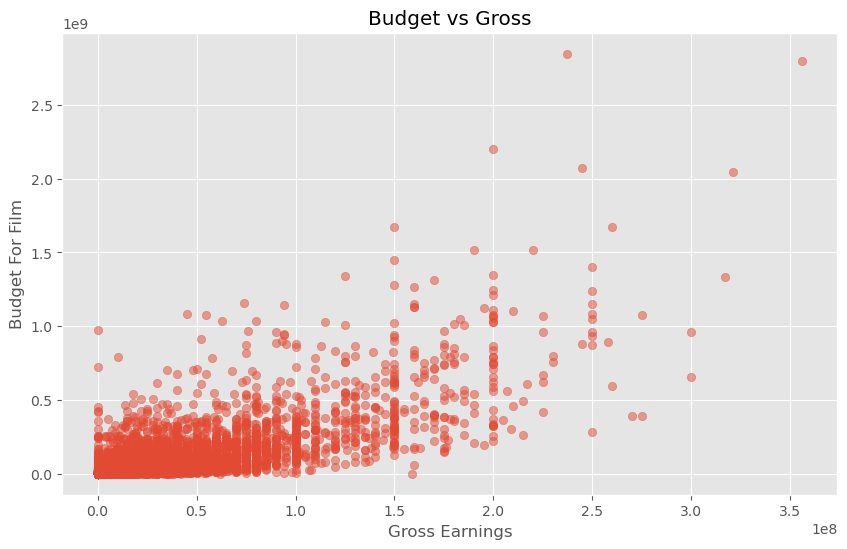

In [24]:
#Scatterplot of Budget vs Gross
import matplotlib.pyplot as plt

# Create a scatterplot of budget vs gross
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.scatter(df['budget'], df['gross'], alpha=0.5)
plt.title('Budget vs Gross')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget For Film')
plt.grid(True)
plt.show()


In [25]:
#Showing the DataFrame
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_day,Release_State,Release_YearMonth
5445,Avatar,PG-13,Action,2009,7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.847246e+09,Twentieth Century Fox,162,2009,(United States),"December-18,"
7445,Avengers: Endgame,PG-13,Action,2019,8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181,2019,(United States),"April-26,"
3045,Titanic,PG-13,Drama,1997,7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2.201647e+09,Twentieth Century Fox,194,1997,(United States),"December-19,"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2.069522e+09,Lucasfilm,138,2015,(United States),"December-18,"
7244,Avengers: Infinity War,PG-13,Action,2018,8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2.048360e+09,Marvel Studios,149,2018,(United States),"April-27,"


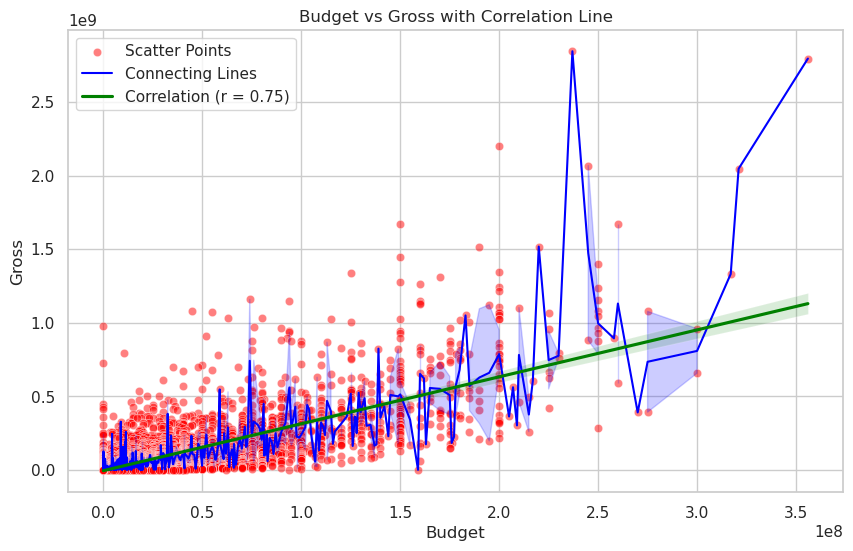

In [26]:
#Plotting Budget vs Gross using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the style for Seaborn (optional)
sns.set(style='whitegrid')

# Create a scatterplot with red points and blue connecting lines
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Plot the scatterplot with red points
sns.scatterplot(x='budget', y='gross', data=df, alpha=0.5, color='red', label='Scatter Points')

# Plot connecting lines in blue
sns.lineplot(x='budget', y='gross', data=df, color='blue', label='Connecting Lines')

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(df['budget'], df['gross'])[0, 1]

# Add a correlation line
sns.regplot(x='budget', y='gross', data=df, color='green', scatter=False, label=f'Correlation (r = {correlation_coefficient:.2f})')

plt.title('Budget vs Gross with Correlation Line')
plt.xlabel('Budget')
plt.ylabel('Gross')

# Add a legend to differentiate the scatter points, connecting lines, and correlation line
plt.legend()

plt.show()


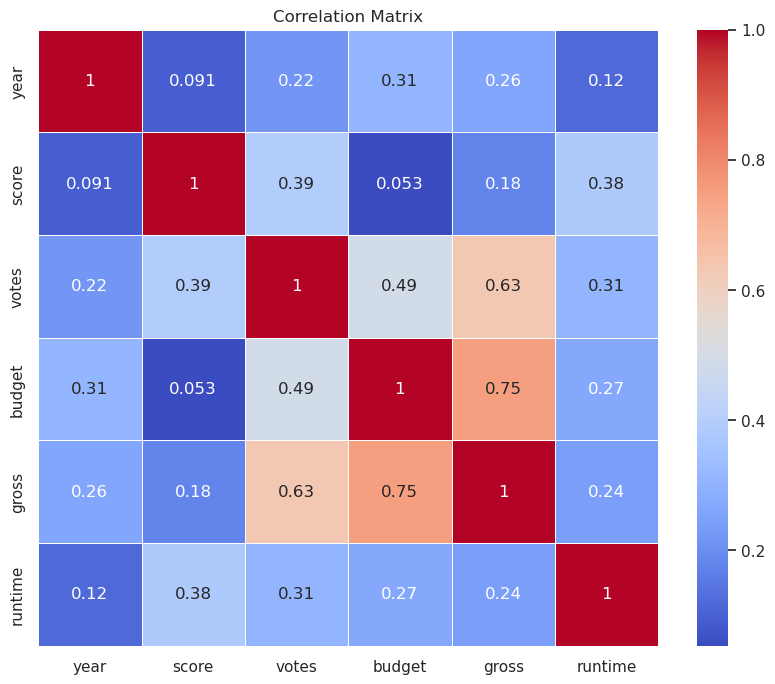

In [29]:
# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include='number')

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()



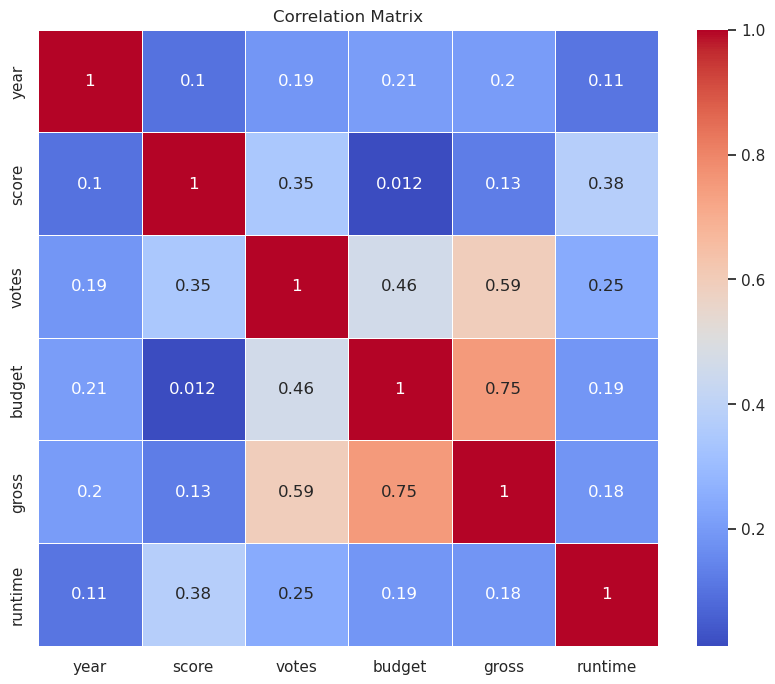

In [36]:
#Looking at the descriptive stastics
import pandas as pd

# Ensure you have only numeric columns
numeric_columns = df.select_dtypes(include='number')

# Handle any missing values in the numeric columns (e.g., fill with 0)
numeric_columns.fillna(0, inplace=True)

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr(method='pearson')

# Display the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


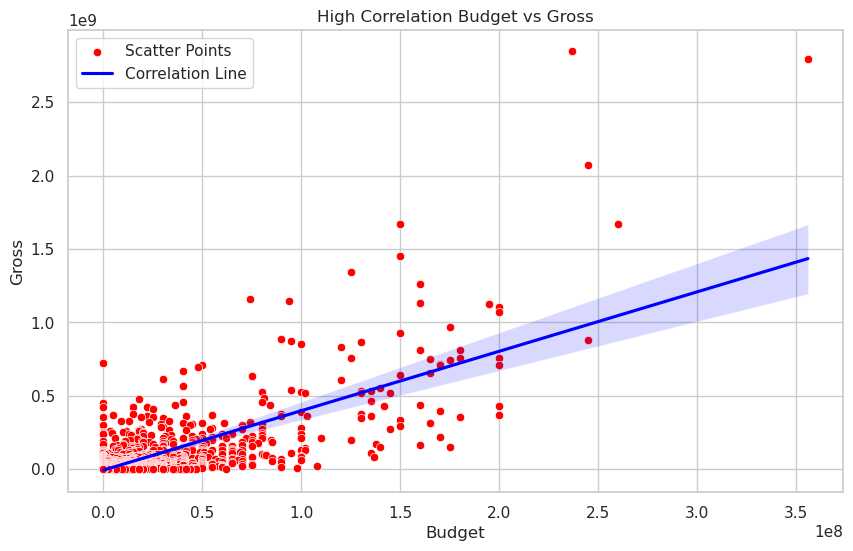

In [35]:
#High Correlation
#Yes I am Correct

import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for Seaborn (optional)
sns.set(style='whitegrid')

# Create a scatterplot with customized colors and a correlation line
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Scatterplot with red points
sns.scatterplot(x='budget', y='gross', data=df, color='red', label='Scatter Points')

# Add a correlation line using regplot
sns.regplot(x='budget', y='gross', data=df, scatter=False, color='blue', label='Correlation Line')

plt.title('High Correlation Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')

# Add a legend to differentiate between the scatter points and the correlation line
plt.legend()

plt.show()


In [37]:
#Looks at Company
df.head()


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_day,Release_State,Release_YearMonth
5445,Avatar,PG-13,Action,2009,7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.847246e+09,Twentieth Century Fox,162,2009,(United States),"December-18,"
7445,Avengers: Endgame,PG-13,Action,2019,8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181,2019,(United States),"April-26,"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2.069522e+09,Lucasfilm,138,2015,(United States),"December-18,"
7480,The Lion King,PG,Animation,2019,6,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1.670728e+09,Walt Disney Pictures,118,2019,(United States),"July-19,"
6653,Jurassic World,PG-13,Action,2015,7,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1.670516e+09,Universal Pictures,124,2015,(United States),"June-12,"


In [40]:
#Counting movies by Companies
company_counts = df['company'].value_counts()

#Summary Statistics for each Company
company_summary = df.groupby('company').agg({'budget': 'mean', 'gross': 'mean'})



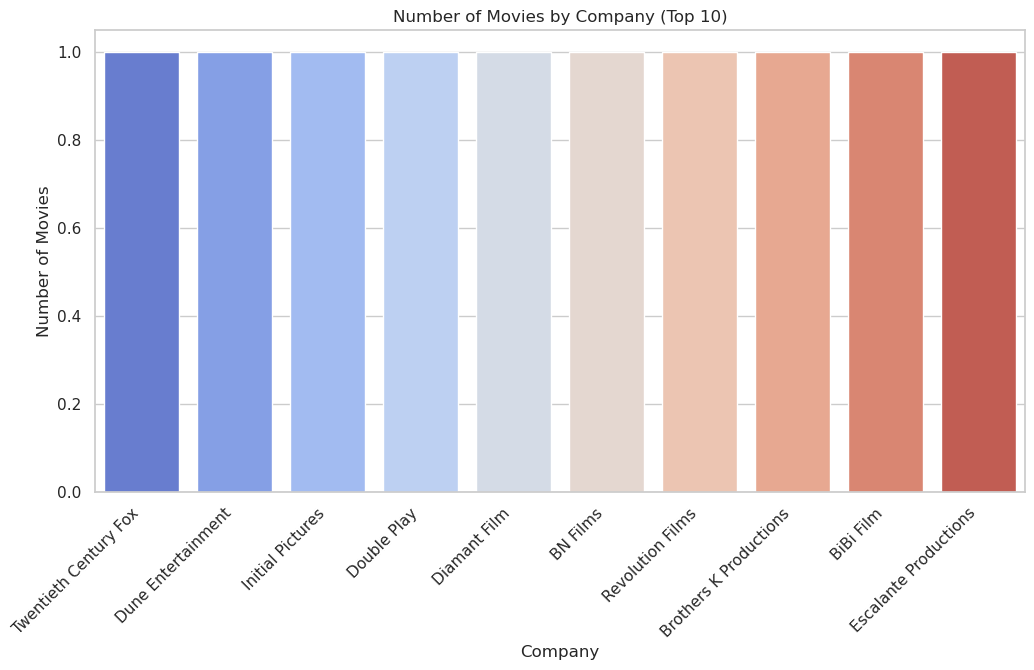

In [43]:
#Visualizations of Comapnies
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for Seaborn (optional)
sns.set(style='whitegrid')

# Count the number of movies by company
company_counts = df['company'].value_counts()

# Create a bar chart with rotated x-axis labels to show entire names
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
barplot = sns.barplot(x=company_counts.index[:10], y=company_counts.values[:10], palette='coolwarm')

# Rotate x-axis labels for better visibility
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Number of Movies by Company (Top 10)')
plt.xlabel('Company')
plt.ylabel('Number of Movies')

plt.show()



In [47]:
import seaborn as sns
df


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_day,Release_State,Release_YearMonth
5445,Avatar,PG-13,Action,2009,7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.847246e+09,Twentieth Century Fox,162,2009,(United States),"December-18,"
7445,Avengers: Endgame,PG-13,Action,2019,8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181,2019,(United States),"April-26,"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2.069522e+09,Lucasfilm,138,2015,(United States),"December-18,"
7480,The Lion King,PG,Animation,2019,6,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1.670728e+09,Walt Disney Pictures,118,2019,(United States),"July-19,"
6653,Jurassic World,PG-13,Action,2015,7,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1.670516e+09,Universal Pictures,124,2015,(United States),"June-12,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,84C MoPic,R,Drama,1989,6,1700,Patrick Sheane Duncan,Patrick Sheane Duncan,Jonathan Emerson,United States,0,0.000000e+00,Charlie Mopic,95,1989,(United States),"April-7,"
1631,Fast Food,PG-13,Comedy,1989,4,653,Michael A. Simpson,Scott B. Sowers,Clark Brandon,United States,0,0.000000e+00,Double Helix Films,92,1989,(United States),"April-28,"
1617,Mortal Passions,R,Crime,1989,4,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0.000000e+00,Gibraltar Entertainment,92,1990,(United States),"January-26,"
1601,My Twentieth Century,NaN,Comedy,1989,7,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0.000000e+00,Budapest Stúdió Vállalat,104,1990,(Japan),"January-13,"


In [48]:
# Remove rows with NaN values in the 'company' column
df = df.dropna(subset=['company'])


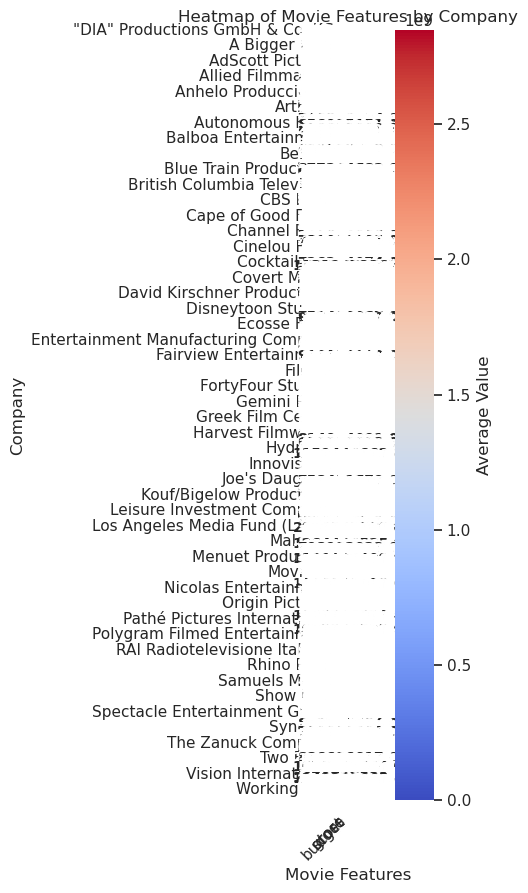

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table to reshape the data for the heatmap
pivot_df = df.pivot_table(index='company', values=['budget', 'gross', 'score'], aggfunc='mean')

# Set up the figure and plot the heatmap
plt.figure(figsize=(12, 10))

# Customize the heatmap appearance
sns.set(font_scale=1)  # Adjust font size
sns.heatmap(pivot_df, cmap='coolwarm', linewidths=0.5, annot=True, fmt=".1f", cbar_kws={'label': 'Average Value'}, annot_kws={"size": 10, "weight": "bold"}, square=True)

# Wrap text for better readability
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha="right")

plt.title('Heatmap of Movie Features by Company')
plt.xlabel('Movie Features')
plt.ylabel('Company')

plt.show()




In [55]:
import pandas as pd

# Assuming 'df' is your DataFrame with movie data

# Group the data by 'company' and calculate the mean budget and gross for each company
company_metrics = df.groupby('company')[['budget', 'gross']].mean()

# Calculate the correlation between companies based on budget and gross
company_correlation = company_metrics.corr()

# Display the correlation matrix
print(company_correlation)


        budget   gross
budget  1.0000  0.7525
gross   0.7525  1.0000


In [65]:
#Reached the End of the Project
#Hope you were able to follow along!


<class 'NameError'>: name 'df_TOP' is not defined